<a href="https://colab.research.google.com/github/kaushikabhishek87/Tensorflow_projects/blob/main/06_transfer_learning_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Using all classes in (101) Food101 Data 

In [3]:
! nvidia-smi

Fri Jun 25 10:02:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
## Helper Fucntions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-06-25 10:02:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-06-25 10:02:35 (96.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [6]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

unzip_data("101_food_classes_10_percent.zip")

--2021-06-25 10:02:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.101.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   142MB/s    in 10s     

2021-06-25 10:02:48 (150 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [7]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/baklava'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/lasagna'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/pancakes'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/guacamole'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/takoyaki'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/pork_chop'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/apple_pie'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/prime_rib'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/sashimi'.
There are 0 directories and 75 images in '101_food_classes_10_perc

In [8]:
train_dir = "101_food_classes_10_percent/train"
test_dir = "101_food_classes_10_percent/test"

In [9]:
# Ste up data inputs
import tensorflow as tf

IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                    label_mode="categorical"
                                                                    ,image_size = IMG_SIZE
                                                                    , batch_size=BATCH_SIZE)
                                                                    
test_data =  tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                   label_mode="categorical",
                                                                   image_size=IMG_SIZE,
                                                                   batch_size=BATCH_SIZE,
                                                                    shuffle=False) # For prediction analysis  

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [10]:
checkpoint_path = "101_food_classes_10_percent_data_model_checkpoint"
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                       save_best_only=True,
                                                       save_weights_only=True,
                                                       monitor="accuracy")

In [11]:
# create data augmentatio layer
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

In [12]:
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2)
], name = "data_augmentation")

base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable=False

# Model Acrh
inputs = layers.Input(shape=(224,224,3), name="input_layer")

X = data_augmentation(inputs)

X = base_model(X, training=False)

X = layers.GlobalAveragePooling2D(name="global_average_pool2D")(X)

outputs = layers.Dense(101, activation="softmax", name="output_layer")(X)

model = tf.keras.Model(inputs, outputs)


16711680/16705208 [==============================] - 0s 0us/step


In [13]:
model.summary() 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pool2D (Globa (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 101)               129381    
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [15]:
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

history_all_classes_10_percent = model.fit(train_data_all_10_percent,
          epochs=5,
          steps_per_epoch=len(train_data_all_10_percent), 
          validation_data = test_data,
          validation_steps=int(0.15* len(test_data)),
          callbacks=[checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 89s 352ms/step - loss: 3.4626 - accuracy: 0.2536 - val_loss: 2.6335 - val_accuracy: 0.4288
Epoch 2/5
237/237 [==============================] - 70s 296ms/step - loss: 2.3468 - accuracy: 0.4609 - val_loss: 2.1852 - val_accuracy: 0.4815
Epoch 3/5
237/237 [==============================] - 64s 269ms/step - loss: 1.9696 - accuracy: 0.5319 - val_loss: 2.0702 - val_accuracy: 0.4833
Epoch 4/5
237/237 [==============================] - 62s 261ms/step - loss: 1.7608 - accuracy: 0.5694 - val_loss: 1.9808 - val_accuracy: 0.4971
Epoch 5/5
237/237 [==============================] - 59s 246ms/step - loss: 1.5975 - accuracy: 0.6087 - val_loss: 1.9153 - val_accuracy: 0.5074


In [16]:
fine_tuning_results = model.evaluate(test_data)
fine_tuning_results


790/790 [==============================] - 87s 111ms/step - loss: 1.7076 - accuracy: 0.5563


[1.7075581550598145, 0.5563168525695801]

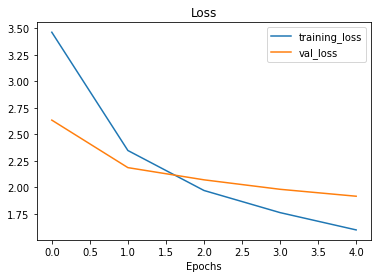

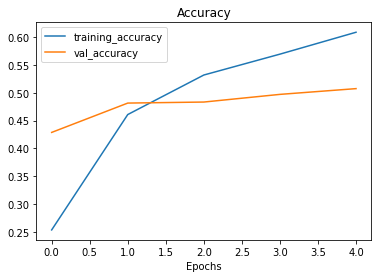

In [17]:
plot_loss_curves(history_all_classes_10_percent)